## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 imbalanced-learn -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 6.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
#Libraries to manipulate the data
import numpy as np
import pandas as pd

#Libraries for Handling Data Imbalance
from imblearn.over_sampling import SMOTE

#Libraries to Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to split the data into training and test sets
from sklearn.model_selection import train_test_split

#Libraries to build the decision tree model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Libraries to tune different models
from sklearn.model_selection import GridSearchCV

#Libraries to compute classification metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, accuracy_score

#Libraries to clear warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Loan_Modelling.csv')

In [ ]:
df = data.copy()

## Data Overview

* Observations
* Sanity checks

### Viewing First and Last 5 rows of Data

In [ ]:
#Display first 5 rows of the data
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Display last 5 rows of data
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


###Checking the Shape of the Dataset

In [ ]:
#Displaying the shape of the Data
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 5000 rows and 14 columns


###Checking Attribute Types

In [ ]:
#Display Information on Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There are 13 integer columns and 1 float column within this data.
* There are 7 categorical variables and 6 numerical variables

###Checking the Statistical Summary

In [ ]:
#Displaying Statistical Summury of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* The youngest person within this dataset is 23 years while the oldest person is 67 years
* This dataset concerns a group of people with an average annual income of $73,774.
* The group has an average of 20 years of professional experience, and each member typically holds an undergraduate degree.

In [ ]:
#Probing the Experience Column
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

There appears to be people with a negative proffesional working experience which does not make sense. This could be a mistake made by the person who entered the data.

In [ ]:
#Making the work experience column absolute to remove all negatives
df['Experience'] = df['Experience'].abs()

In [ ]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

###Checking for Missing Values

In [ ]:
#Checking for Null Values
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


There are no null values present within this data.

###Checking for Duplicates

In [ ]:
#Checking for duplicates
df.duplicated().sum()

np.int64(0)

There are no duplicates within this data

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis


####Defining Univariate Analysis Functions

In [ ]:
#Creating a function for Univariate Data Analysis
'''The purpose of this function is to generate a subplot that containes both histograms and frequency charts '''

def histcountplot_analysis (data):
  plt.figure(figsize=(15, 15)) #Setting the Figure Size

  discrete_col = ['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']
  #Selecting all columns with discrete values so i can run a countplot on them

  for i, features in enumerate(data.columns): #Using a for loop to loop through the columns for the data

    plt.subplot(5, 3, i+1) #Creates a 3 x 3 of each individual histplot

    plt.title(f'Distribution of {features}') #Title definition
    plt.xticks(rotation=90) #Setting rotation for the x axis labels to 90 degrees
    plt.tight_layout() #improves readability and prevents overlapping

    if features in discrete_col:
      sns.countplot(data, x=features, stat='percent') #Generating Countplot for discrete value columns with exception of age, income, experience and mortgage
    else:
      sns.histplot(data, x=features, kde=True) #Generatating hisplot for continuous value columns

In [ ]:
'''The purpose of this function is to generate a subplot that containes both boxplots '''

def boxplot_analysis (data): #Defining the function
    plt.figure(figsize=(15, 15))

    exclude_col = ['ID','ZIPCode','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']
    #Excluding Columns that don't provide useful information

    for i, features in enumerate(data.columns):

        plt.subplot(5, 3, i+1)
        plt.title(f'Distribution of {features}')
        plt.tight_layout()

        sns.boxplot(data, x=features)

####Visualizing Features

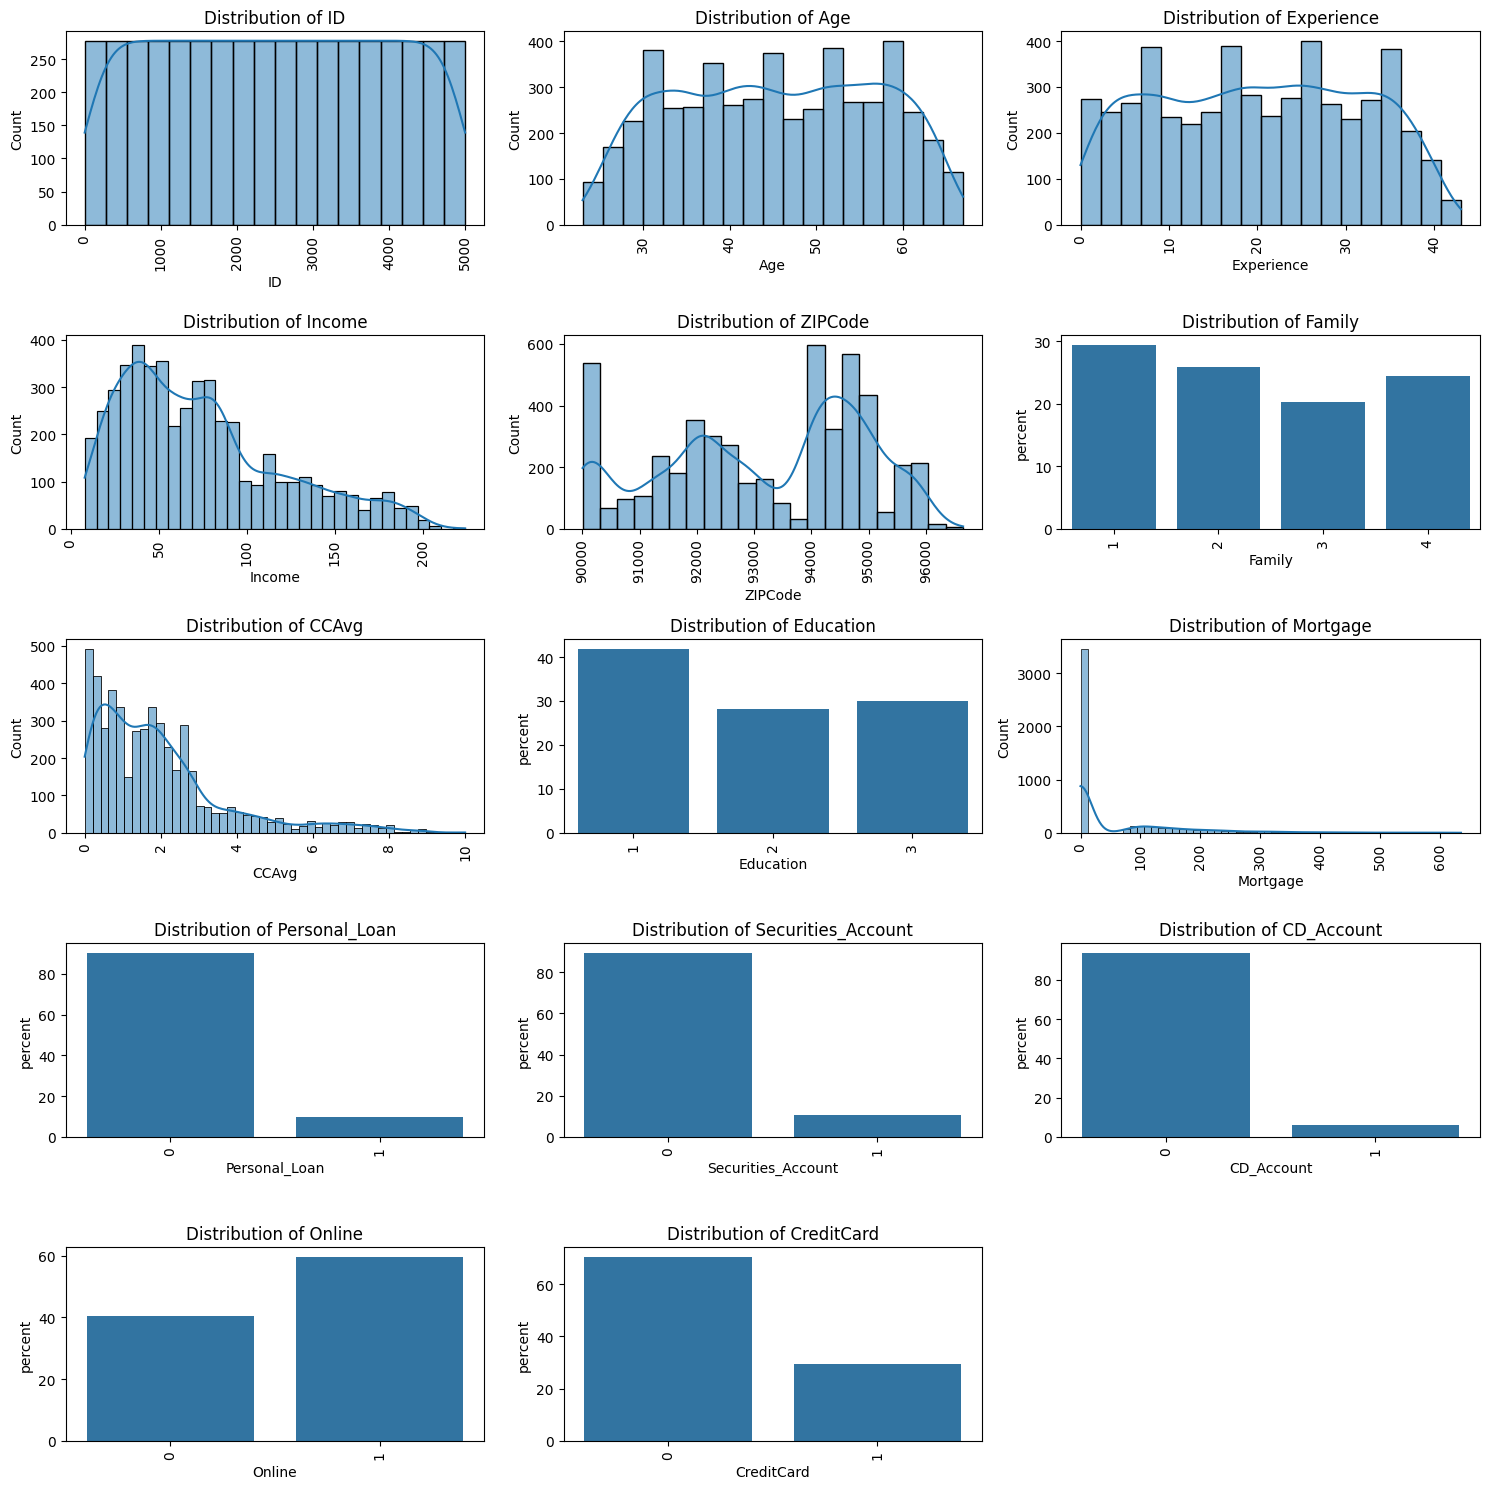

In [ ]:
#Displaying Histograms
histcountplot_analysis(df)

From the above histograms and bargraphs it can be deduced that:

* The distribution of mortgage values is heavily right-skewed with numerous outliers. This skewness arises because many individuals in the dataset have a mortgage value of zero. This situation can occur for several reasons:

  * Mortgage Paid Off: These individuals may have fully paid off their mortgages.

  * Renting: They might be renting their residences and thus do not own property.

  * Alternative Financing: They could own property but have financed it through alternative methods rather than a traditional mortgage.

* Over 3000 people do not have credit cards issued by other banks, however, about 1500 of them do.

* Alot of the people within this dataset don't have a securities account with the bank.

* A large number of these people are within the age bracket of 30 and 60. These people fall within the highly educated class.

* About 2000 people don't use internet banking facilities while the rest do.

* Alot of these people don't have a Certificate of Deposit account with the bank.

* Alot of people did not accept the personal loan offered in the last compaign done by the bank.

* The credit score is right skewed.

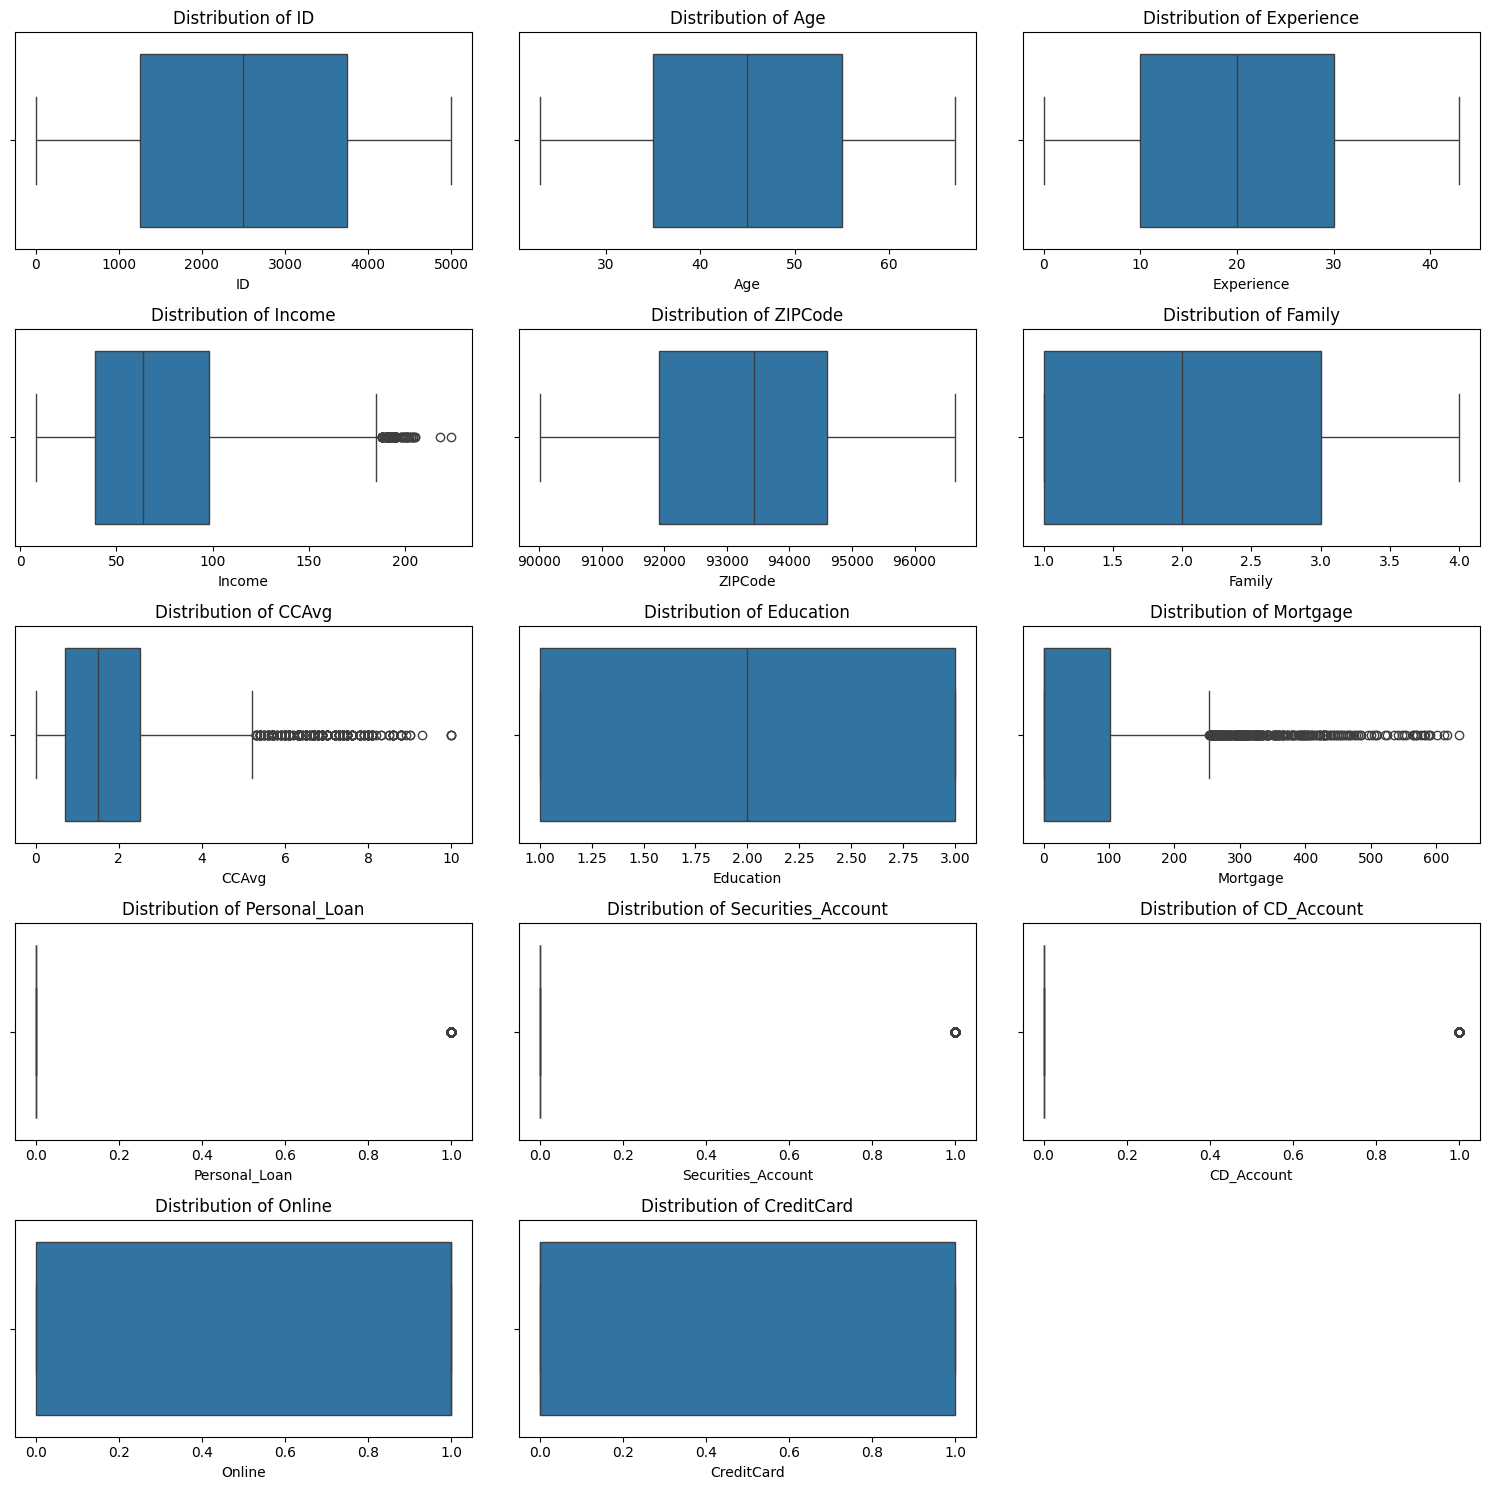

In [ ]:
boxplot_analysis(df)

* It has been confirmed by the box plot that alot of outliers exist in the Mortgage distribution graph.
* Family is left skewed with majority of the people either living by themselves have a household size of 3.
* Age is normally distributed with the majority of the data consisting of people between the ages of 35 and 55.
* The majority of people have minimal average spending on credit cards per months with the exception of some outliers who spend way more than the majority of people within this data.
* The majority of people have 10 to 30 years proffessional working experience

### Bivariate Analysis

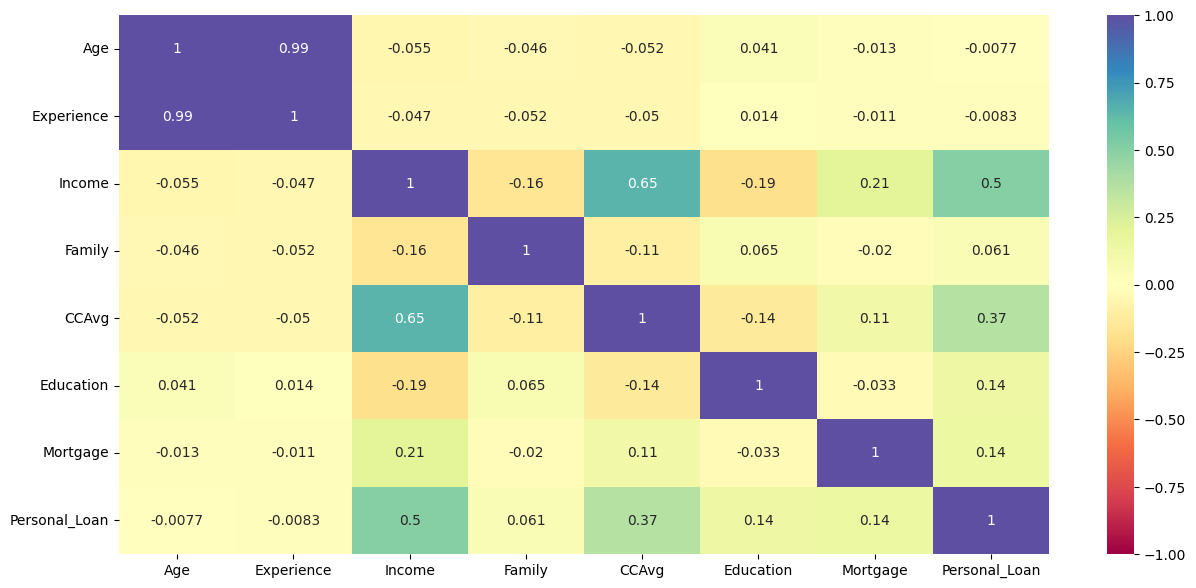

In [ ]:
#Puttiing all numeric columns in to one variable except ID
num_features = df.select_dtypes(include=np.number).drop(columns=['ID','Securities_Account','CD_Account','Online','CreditCard', 'ZIPCode']).columns

#Ploting a heatmap of the above data
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_features].corr(), annot=True, vmin=-1, vmax=+1, cmap= 'Spectral');

* There a strong positive correlation between experience and age which was to be expected.
* CCAvg and Income are positively correlated. This means that people with larger income tend to use their credit cards alot because they can afford the dept.
* There is some correlation between mortgage and income. This a reflection of the kind of lifestyle people with larger incomes live.
* There is a negative correlation between education and income. This means people lower education tend to have larger income. This may be because these people want to focus more on business than academia.
* Theres an inverse relationship between family and income. This relationship is seen between family and CCAvg though its not that strong.
* There is a negative correlation between education and CCAvg, while there is a positive correlation between mortgage and CCavg.
* It seems CCAvg is connected to all the variables in someway except age and experience
* Personal Loan correlates strongly with income and CCAvg. it has a fairly strong correlation between education and mortgage.



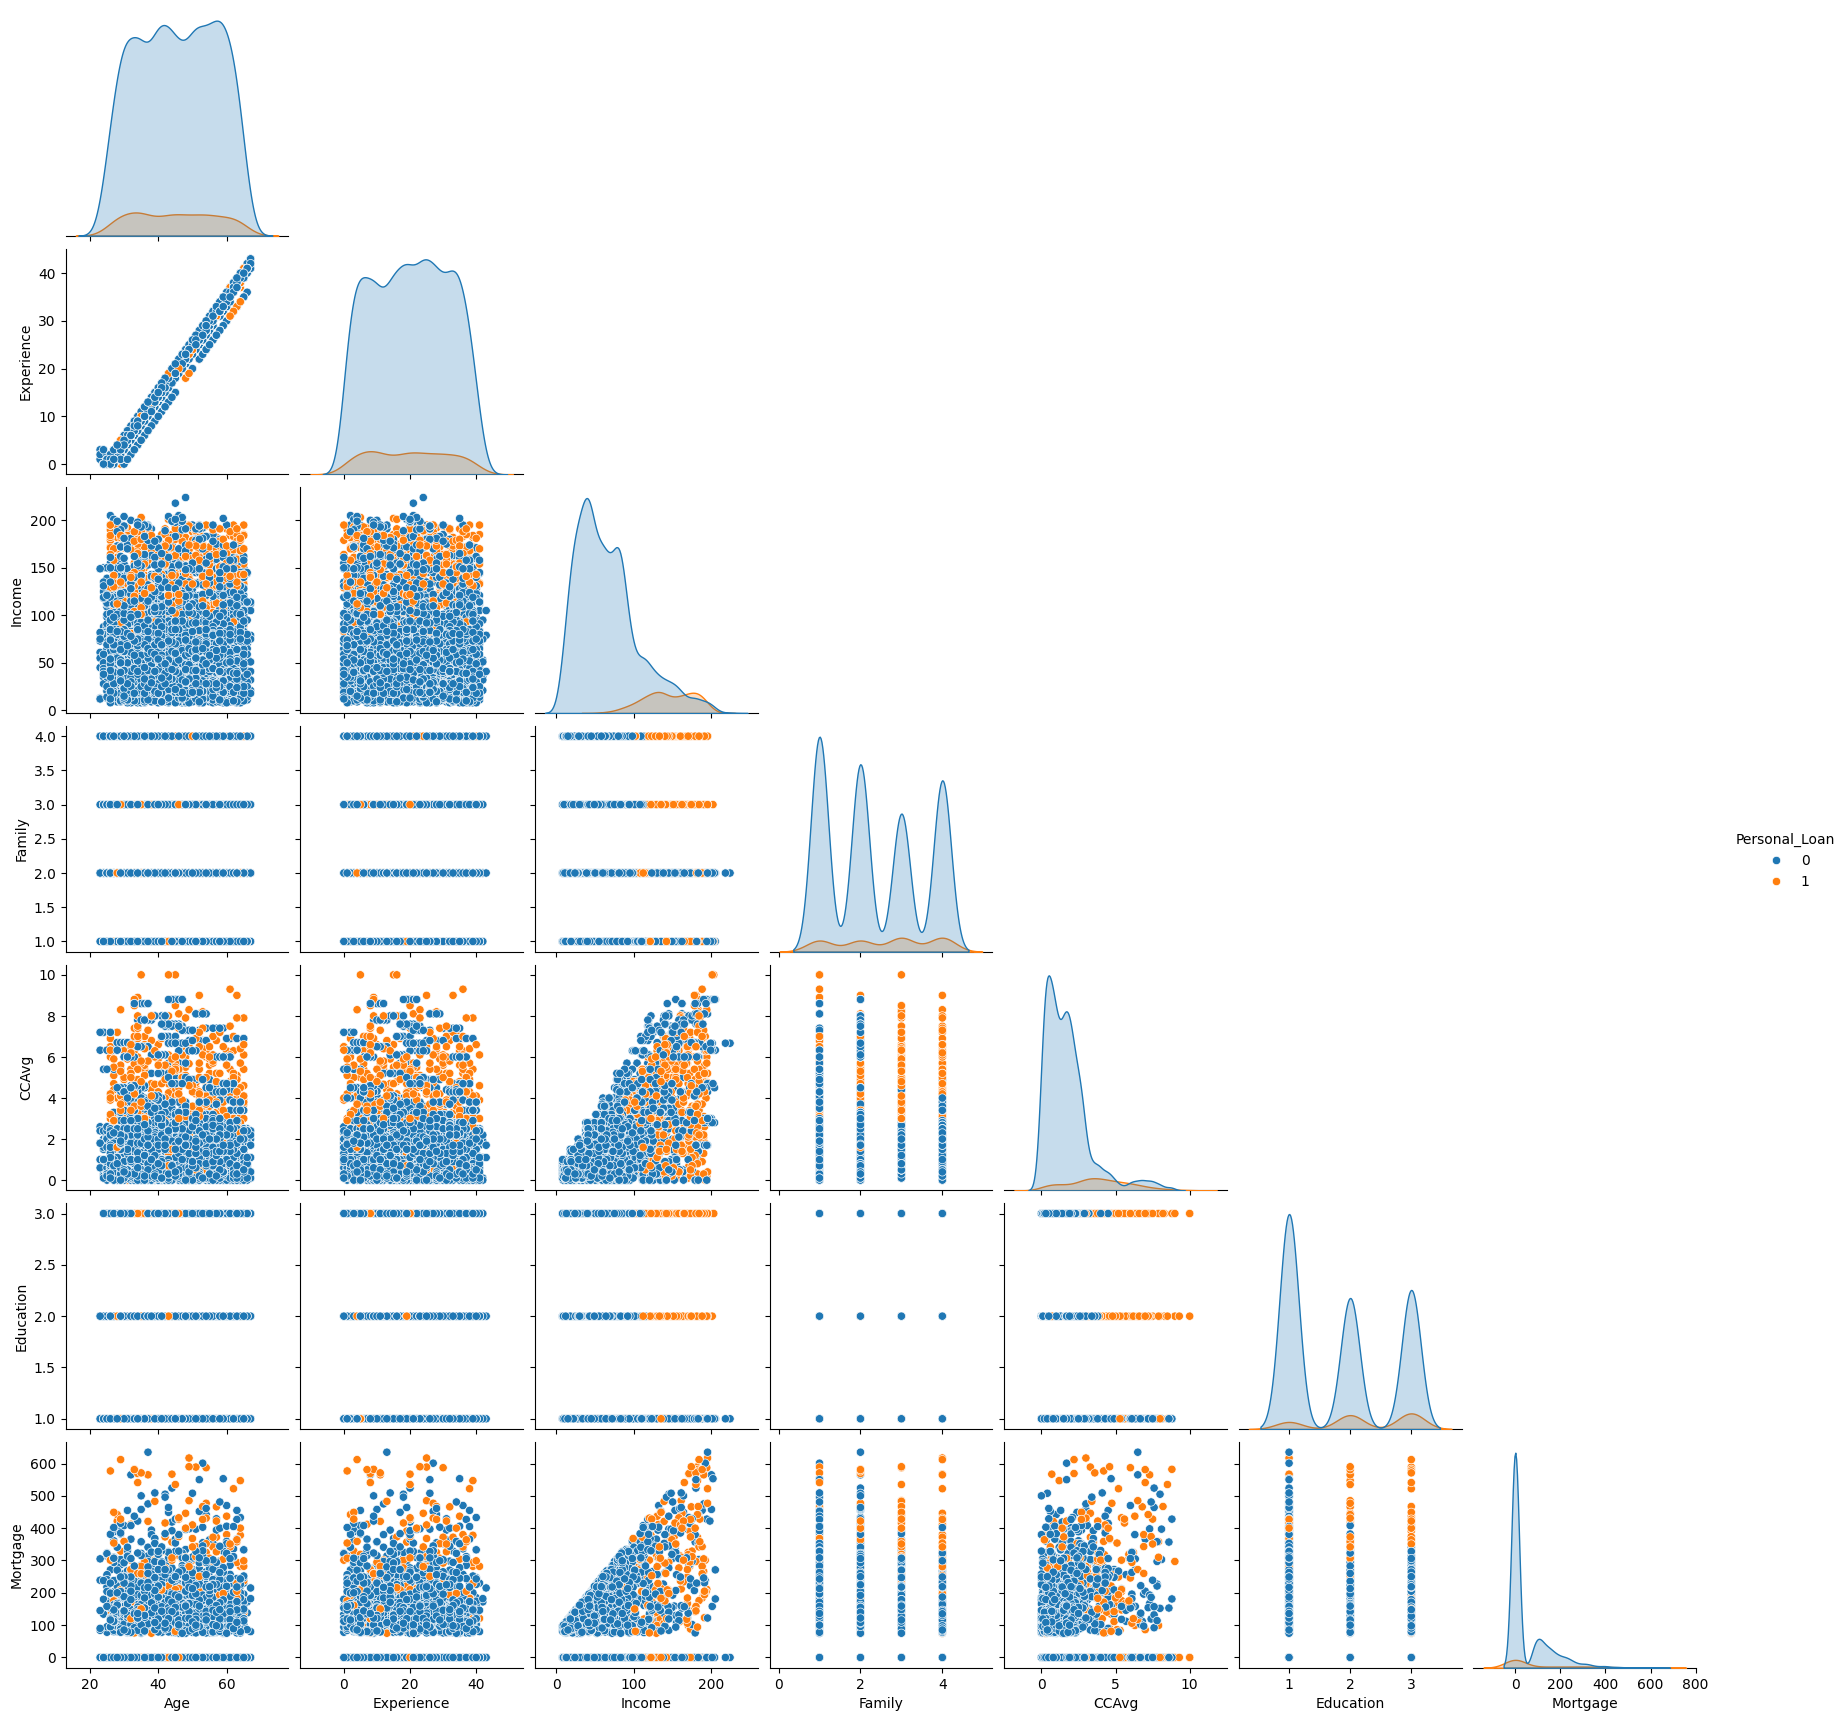

In [ ]:
#Dropping Personal Loan
num_features=num_features.drop(['Personal_Loan'])

#Analysing Variables using Pairplot with Personal Loan as the Target Variable
sns.pairplot(df, vars=num_features, hue='Personal_Loan', diag_kind='kde', corner=True);

* People with more than $300,000 in mortgage were more likely to accept the personal loans though there a few below this threshhold that were exceptions. According to the distribution, age was not a factor.

* People with an average credit spending of 2.5k were more likely to accept the personal loans offered by the bank.

* People with who made at least a 100k annually were more likely to accept the personal loan offered by the bank.

* In this data Age does not vary with an interest in perchasing a personal loan

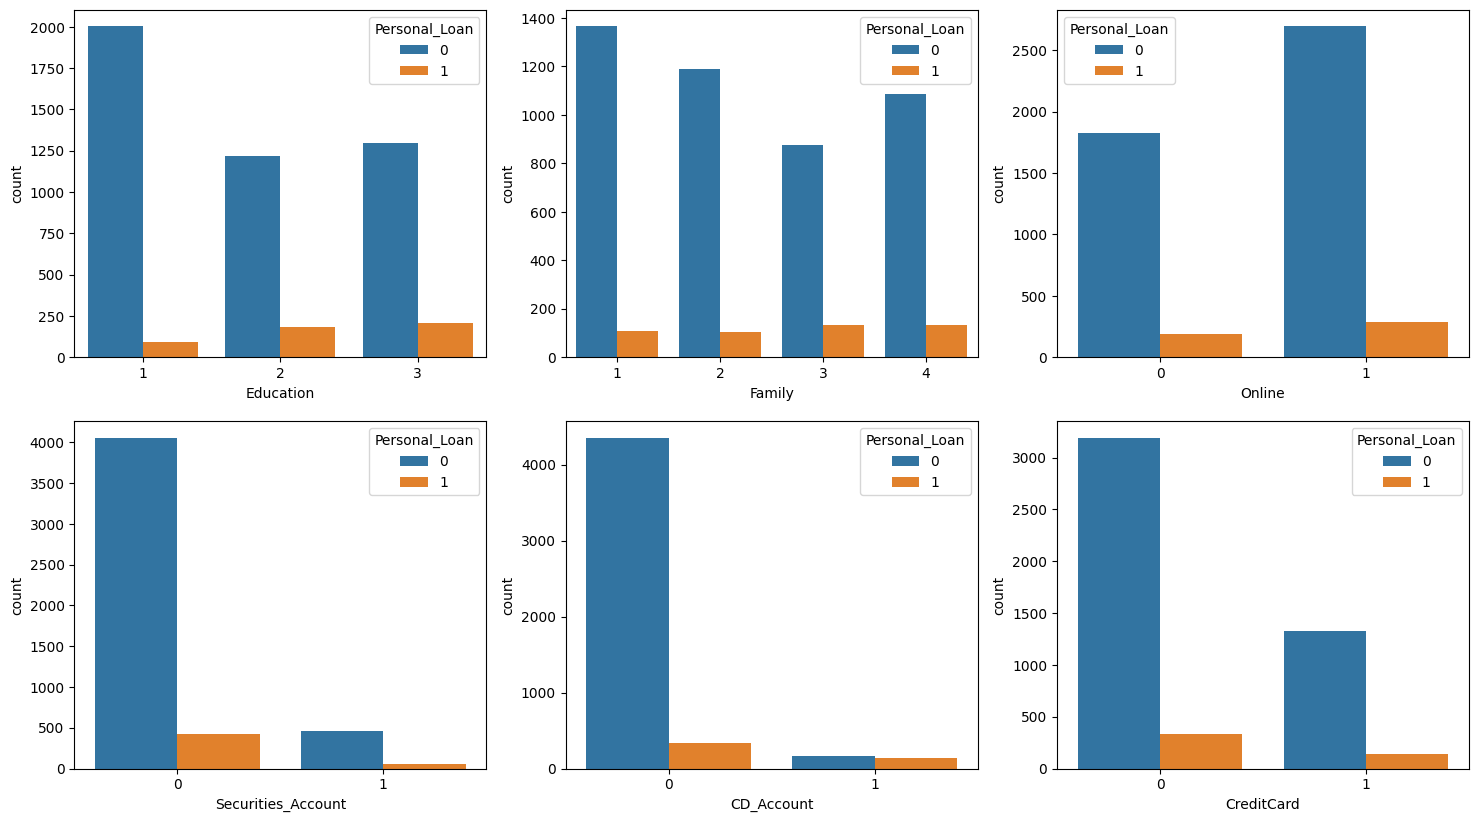

In [ ]:
#Analyzing categorical variables in the data with a count plot
cat_var=['Education', 'Family', 'Online', 'Securities_Account','CD_Account','CreditCard']

#Generating a subplot with hue as personal loan
plt.figure(figsize=(15,12))

for i, features in enumerate(cat_var):

  plt.subplot(3, 3, i+1)
  plt.tight_layout();

  sns.countplot(df, x=features, hue='Personal_Loan')

In [ ]:
#Calculating the percentage distribution for the above
for i in df[cat_var]:
  print(df.groupby(i)['Personal_Loan'].value_counts(normalize=True).mul(100).round(2))
  print('\n')

Education  Personal_Loan
1          0                95.56
           1                 4.44
2          0                87.03
           1                12.97
3          0                86.34
           1                13.66
Name: proportion, dtype: float64


Family  Personal_Loan
1       0                92.73
        1                 7.27
2       0                91.82
        1                 8.18
3       0                86.83
        1                13.17
4       0                89.03
        1                10.97
Name: proportion, dtype: float64


Online  Personal_Loan
0       0                90.62
        1                 9.38
1       0                90.25
        1                 9.75
Name: proportion, dtype: float64


Securities_Account  Personal_Loan
0                   0                90.62
                    1                 9.38
1                   0                88.51
                    1                11.49
Name: proportion, dtype: float64


CD_Accoun

* According to the data, 13.66% of people who had an advanced/professional degree where interested in the personal loans as compared to the 4.44% of people who have an undergraduate degree. There is a steady increase from the lower levels of education to the higher levels of education.

* There is no observable trend for the use of online banking and the use of credit cards issued by the bank.

* People who already have securities account were more likely to accept and personal loan from the bank. There was a 2.11% increase when people already had a securities account.

* People who already had a CD_Account with the bank were also more likely to accept the personal loan from the bank.

* There is an explosive increase in the interest in personal loans as the family size increased.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
#Generating Independent and Response Variables
X = df.drop(columns=['Personal_Loan', 'ID', 'ZIPCode'], axis=1)
y = df['Personal_Loan']

In [ ]:
y.value_counts()

,count
Personal_Loan,
0,4520
1,480


The target variable is severely imbalanced. The imbalance will have to be dealt so our model will be able to predict the minority class very well since the minority class is our focus.

In [ ]:
#Applying the SMOTE method to solve the problem of imbalance in Personal Loan
smote = SMOTE (sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

,count
Personal_Loan,
0,4520
1,4520


The issue of imbalance has been dealt with. Now we can proceed to build the our model.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X_sm['Education'] = encoder.fit_transform(X_sm['Education'])

X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [ ]:
#Splitting Data into an 80/20 ratio of train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, stratify=y_sm, random_state=42)

In [ ]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (7232, 11)
Shape of test set: (1808, 11) 

Percentage of classes in training set:
Personal_Loan
1    50.0
0    50.0
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    50.0
1    50.0
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

Defining a utility function to collate all the metrics into a single data frame, and another to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

### Model Building

In [ ]:
#Creating an Instance of the Decision Tree Model
dtree1 = DecisionTreeClassifier(random_state=42)

#Fiting the Model to the Training Data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Model Evaluation

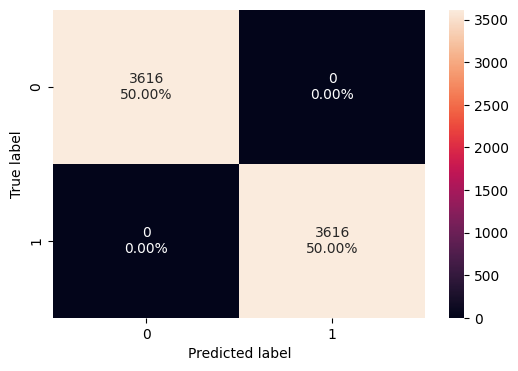

In [ ]:
#Plotting Confusion Matrix
plot_confusion_matrix(dtree1, X_train, y_train)

In [ ]:
#Displaying Model Performance for training data
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


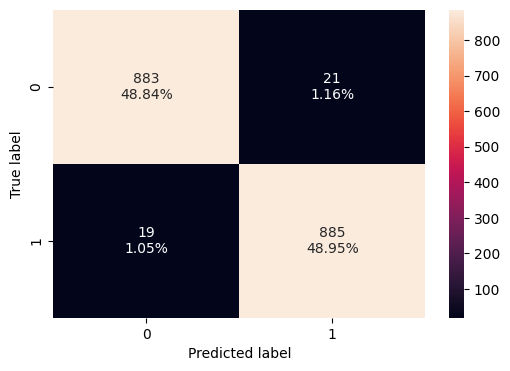

In [ ]:
#Plotting Confusion Matrix for Test Data
plot_confusion_matrix(dtree1, X_test, y_test)

On the unseen data:
* The model was able to predict correctly 889/904 true positives with 15 of them being false negatives
* The model was able to predict correctly 870/904 true negatives with 34 of them being false positives

In [ ]:
#Displaying Model Performance for Test Data
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.977876,0.978982,0.976821,0.977901


The metrics above indicate the model generalizes too well for unseen data. We would need to take the data through some treatments to limit the overfitting so we can achieve the best model possible.

#### Visualizing the Decision Tree

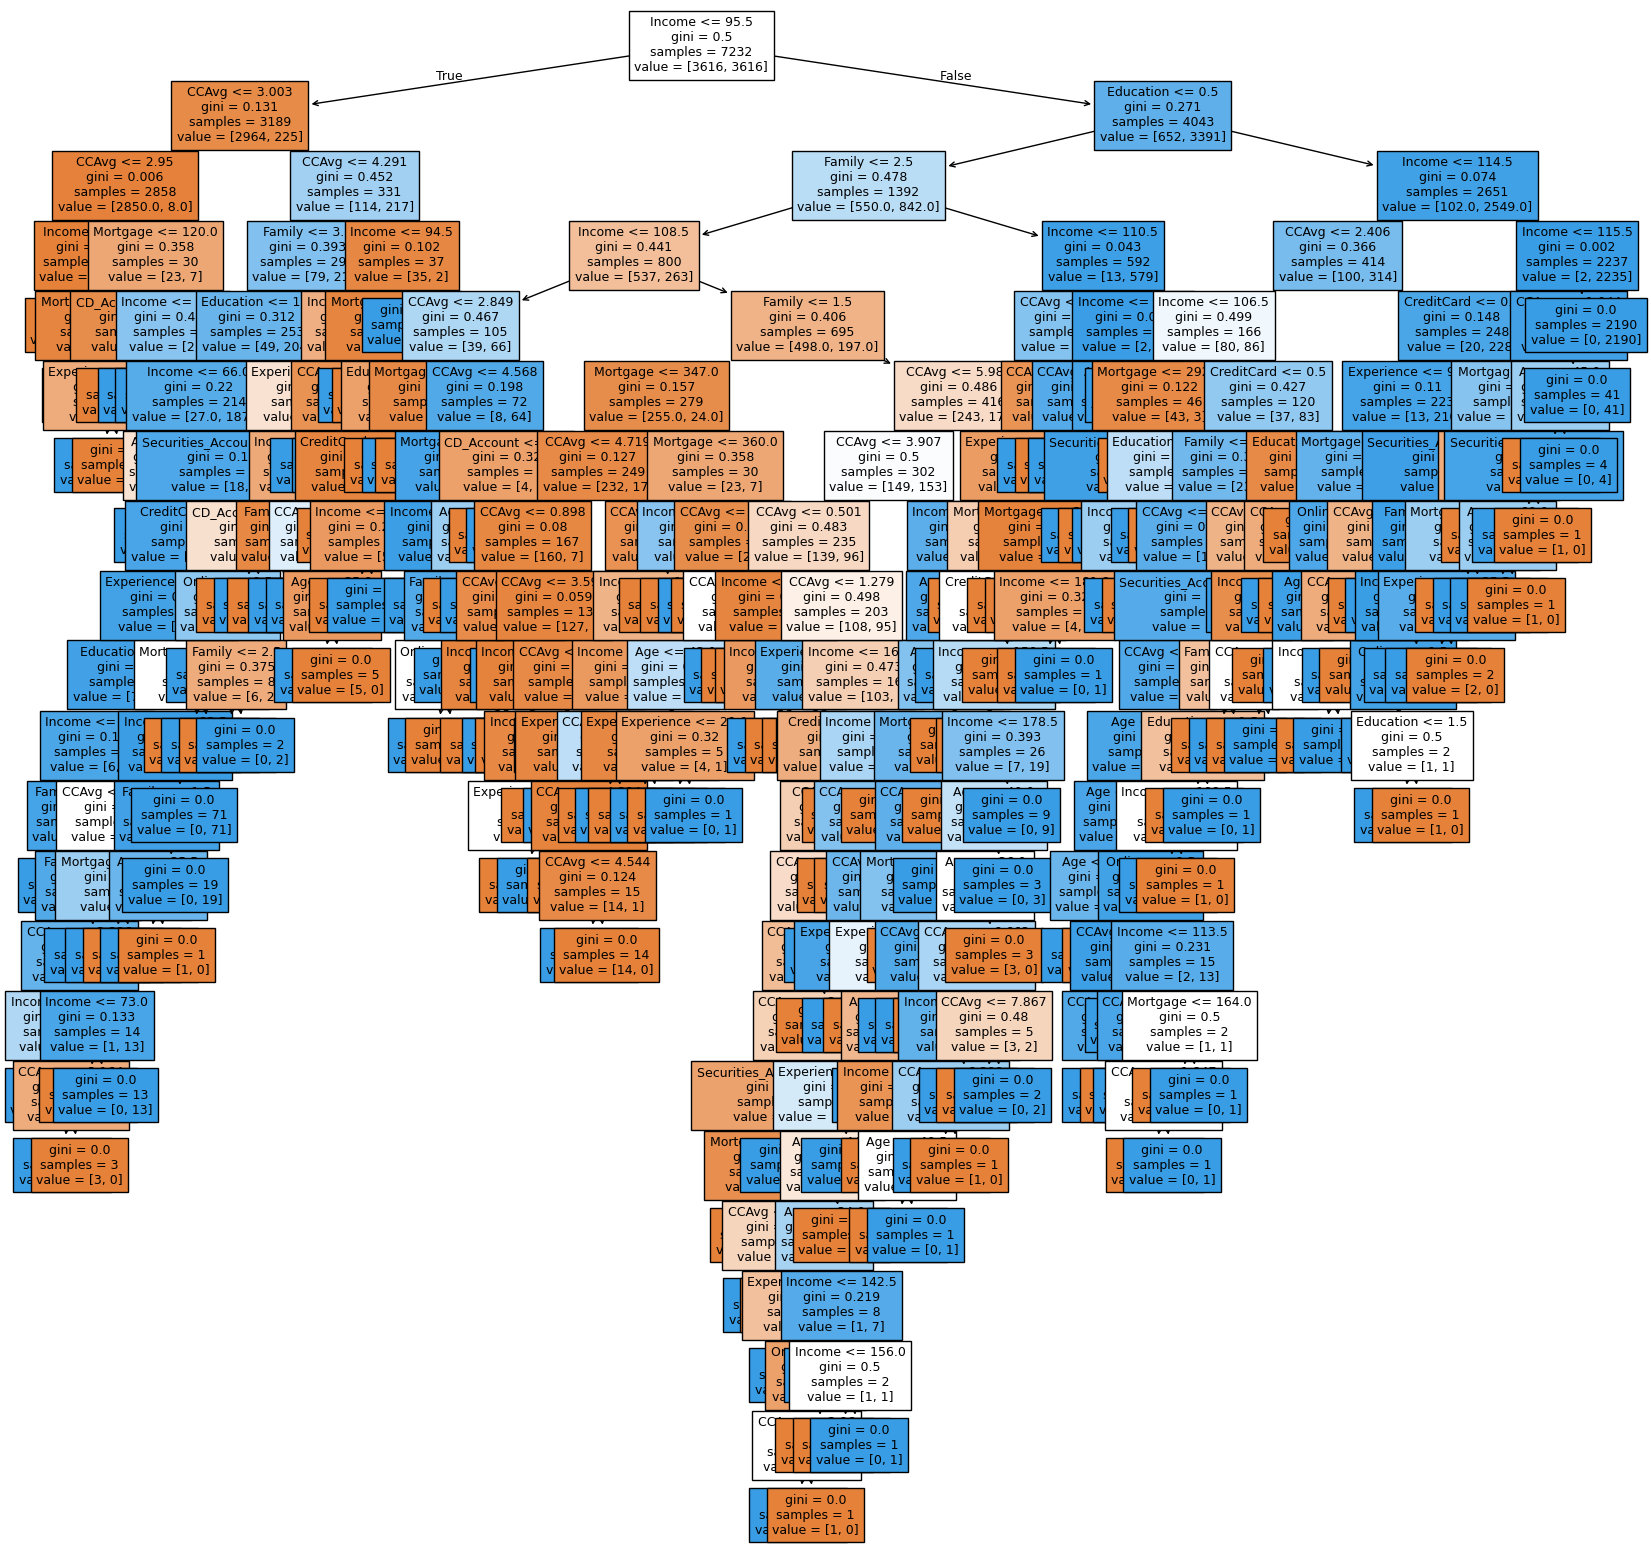

In [ ]:
#listing  feature names in X_train
feature_names = list(X_train.columns)

#setting the figure size for the plot
plt.figure(figsize=(20, 20))

#plotting the decision tree
out = tree.plot_tree(
    dtree1,                         #decision tree classifier model
    feature_names=feature_names,    #list of feature names (columns) in the dataset
    filled=True,                    #fill the nodes with colors based on class
    fontsize=9,                     #font size for the node text
    node_ids=False,                 #do not show the ID of each node
    class_names=None,               #whether or not to display class names
)

#add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    #set arrow color to black
        arrow.set_linewidth(1)          #set arrow linewidth to 1

#displaying the plot
plt.show()

This is a very complex tree as it has too many branches which slow down the decision making process.

## Model Performance Improvement

#### Decision Tree (Pre-Prunning)

In [ ]:
#defining the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

#initializing variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

#iterateing over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            #initializing the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            #fitting the model to the training data
            estimator.fit(X_train, y_train)

            #making predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            #calculating F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            #calculating the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            #updating the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

##### Model Building

In [ ]:
#creating an instance of the best model
dtree2 = best_estimator

#fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(2), max_leaf_nodes=np.int64(10),
                       min_samples_split=np.int64(10), random_state=42)

##### Model Evaluation

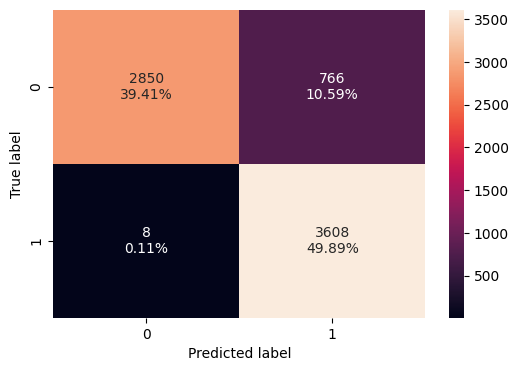

In [ ]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [ ]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.892976,0.997788,0.824874,0.903129


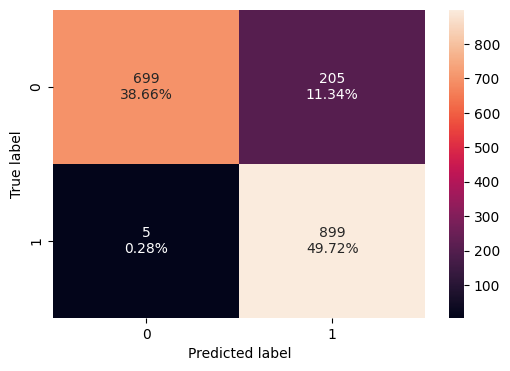

In [ ]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [ ]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.88385,0.994469,0.814312,0.895418


The f1 scores are nearly the same which is an indication that this model is generalizing well, however, this came at the expense of precision but there is improved recall.

##### Visualizing Tree

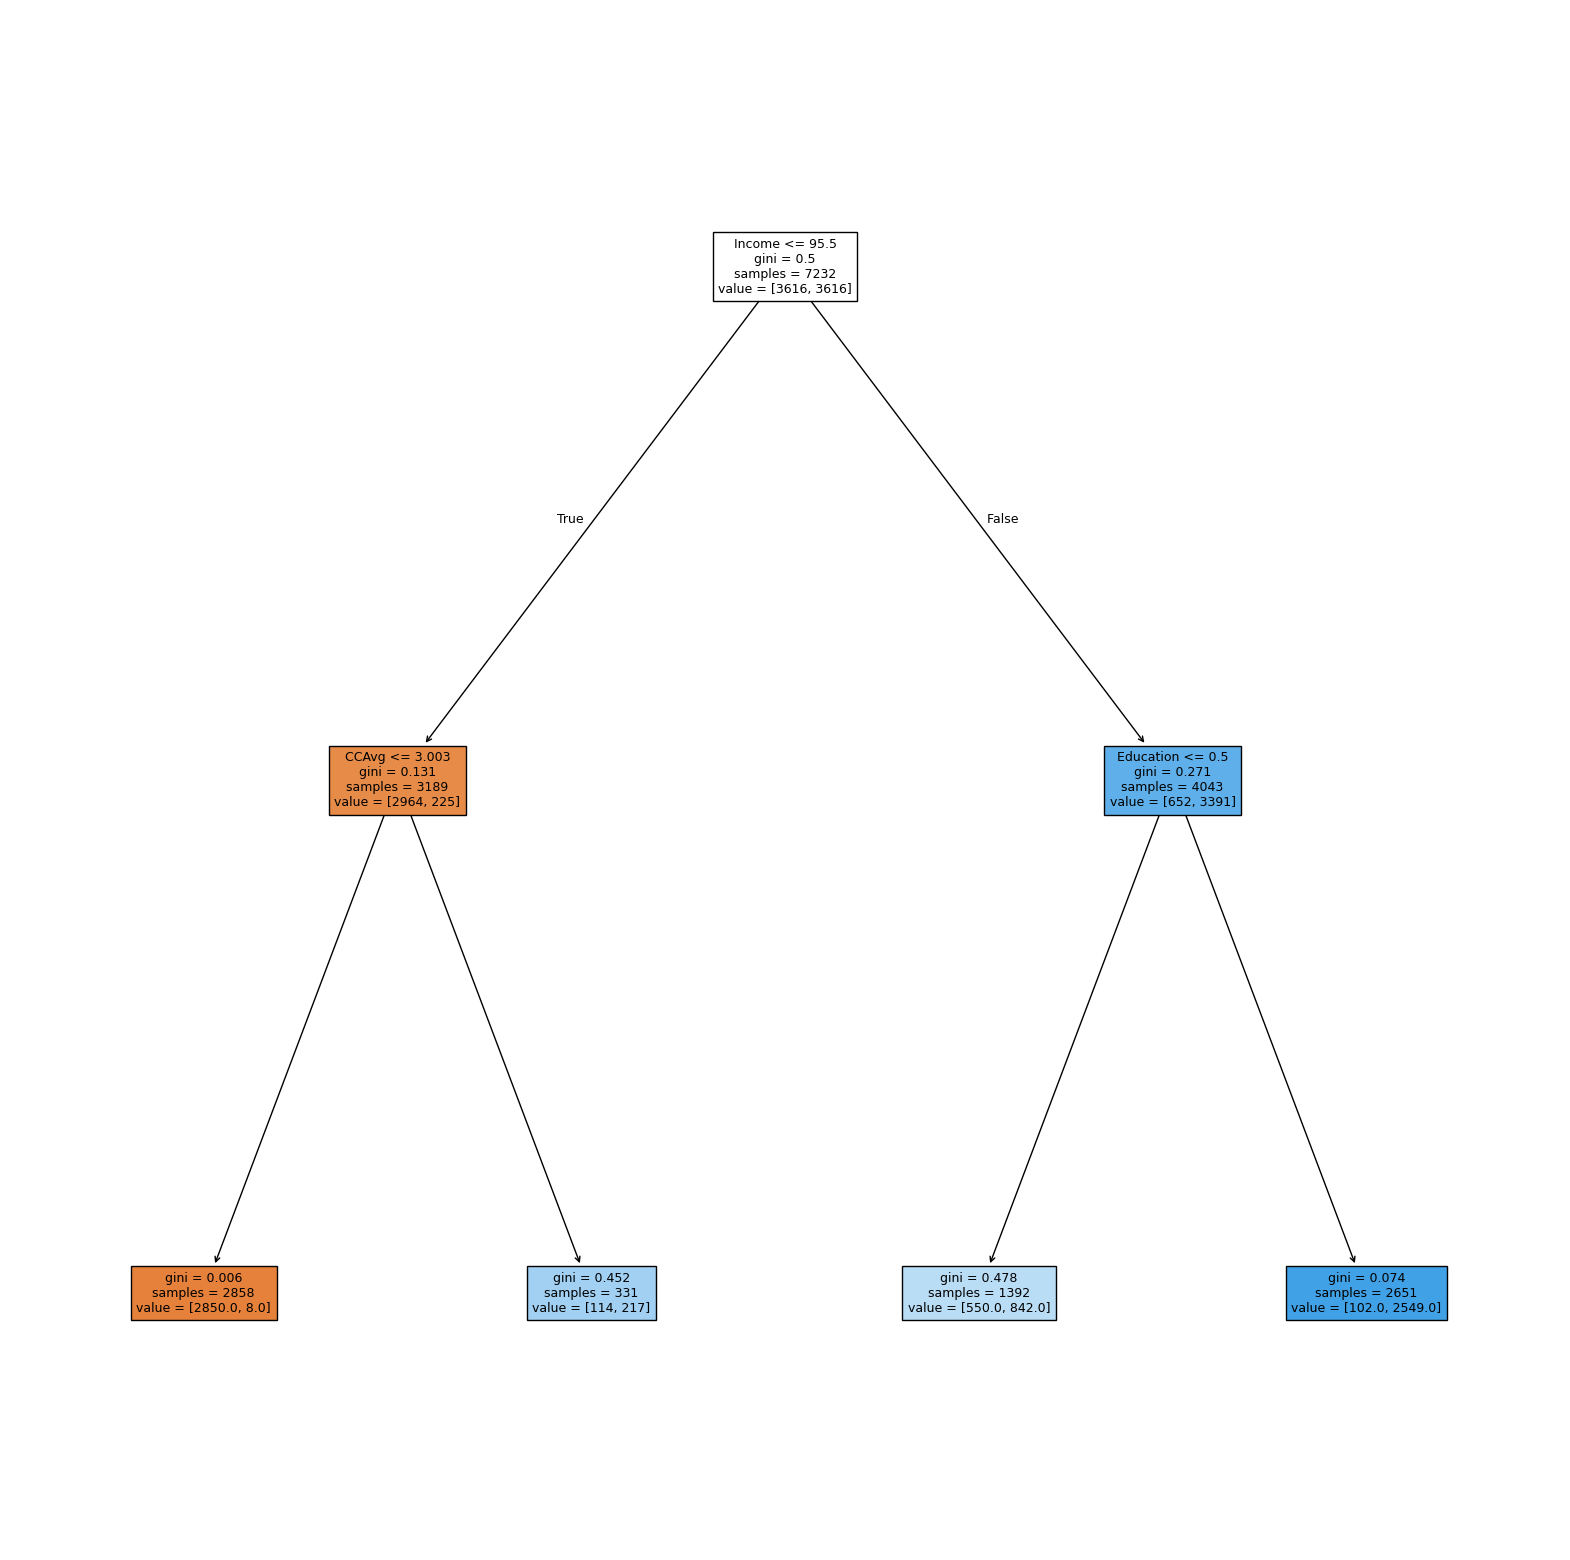

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

This is a simple and easy to read decision tree.

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 95.50
|   |--- CCAvg <= 3.00
|   |   |--- weights: [2850.00, 8.00] class: 0
|   |--- CCAvg >  3.00
|   |   |--- weights: [114.00, 217.00] class: 1
|--- Income >  95.50
|   |--- Education <= 0.50
|   |   |--- weights: [550.00, 842.00] class: 1
|   |--- Education >  0.50
|   |   |--- weights: [102.00, 2549.00] class: 1



#### Decision Tree (Post-Prunning)

In [ ]:
#Creating an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

#Computing the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

#Extracting the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

#Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000091,0.000272
2,0.000091,0.000545
3,0.000091,0.000819
4,0.000092,0.001094
...,...,...
104,0.004428,0.096740
105,0.005595,0.102335
106,0.034959,0.137294
107,0.035886,0.209065


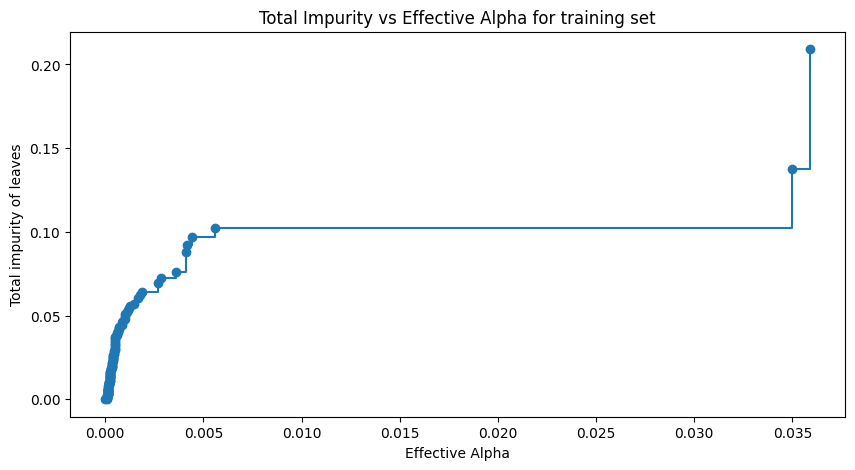

In [ ]:
#Creating a figure
fig, ax = plt.subplots(figsize=(10, 5))

#Plotting the total impurities versus effective alphas, excluding the last value,
#using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

#Setting the x-axis label
ax.set_xlabel("Effective Alpha")

#Setting the y-axis label
ax.set_ylabel("Total impurity of leaves")

#Setting the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

##### Model Building

In [ ]:
#Initializing an empty list to store the decision tree classifiers
clfs = []

#Iterating over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    #Creating an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    #Fitting the classifier to the training data
    clf.fit(X_train, y_train)

    #Appendinf the trained classifier to the list
    clfs.append(clf)

#Printing the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.2909348911245504


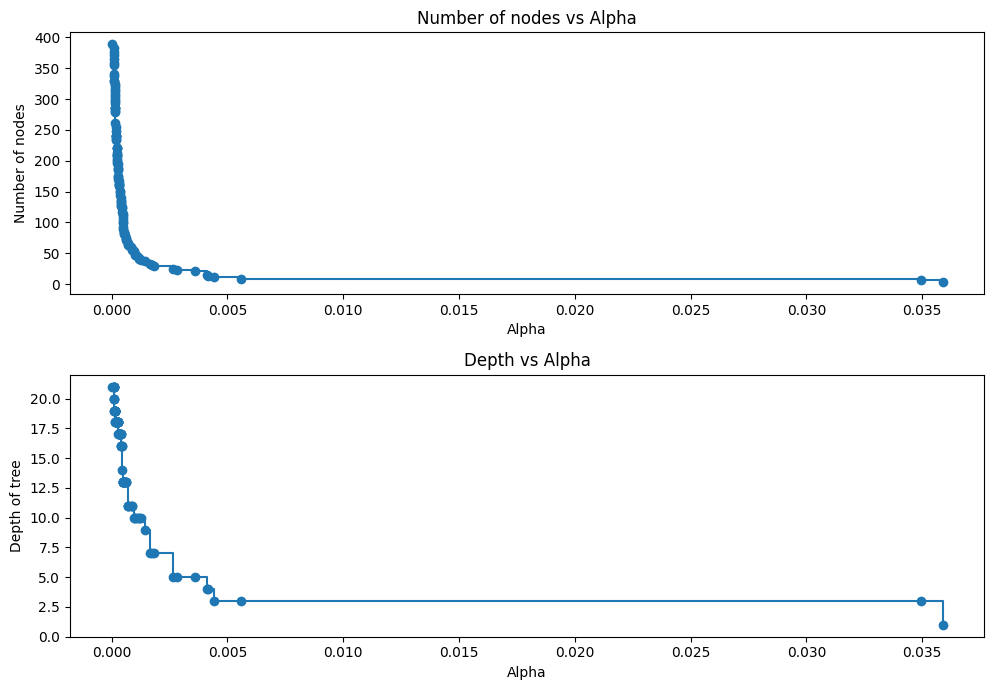

In [ ]:
#Removing the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#Extracting the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

#Extracting the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

#Creating a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

#Plotting the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

#Plotting the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

#Adjusting the layout of the subplots to avoid overlap
fig.tight_layout()

In [ ]:
train_f1_scores = []  #Initializing an empty list to store F1 scores for training set for each decision tree classifier

#Iterating through each decision tree classifier in 'clfs'
for clf in clfs:
    #Predicting labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    #Calculating the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    #Appending the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [ ]:
test_f1_scores = []  #Initializing an empty list to store F1 scores for test set for each decision tree classifier

#Iterating through each decision tree classifier in 'clfs'
for clf in clfs:
    #Predicting labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    #Calculating the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    #Appending the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

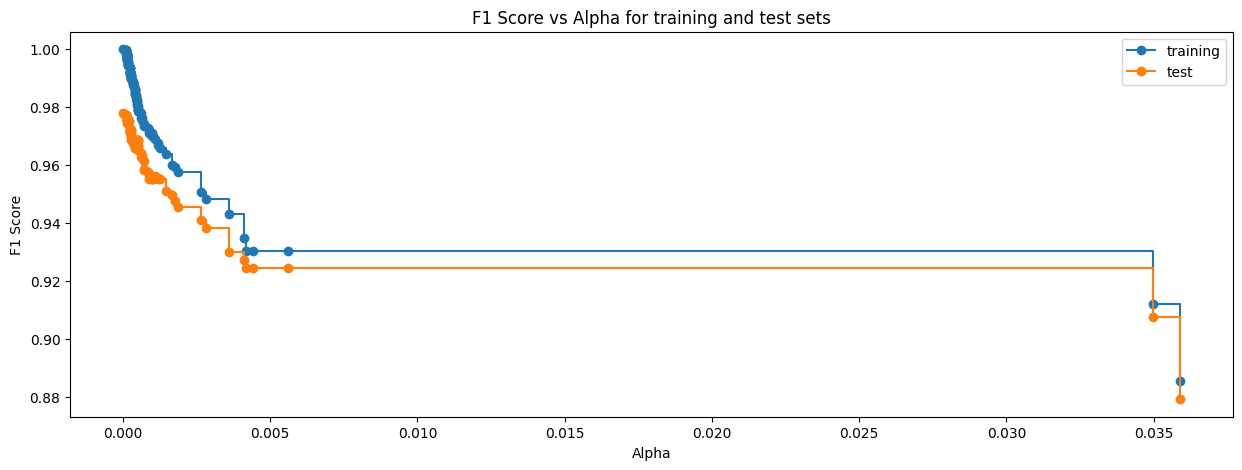

In [ ]:
#Creating a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  #Set the label for the x-axis
ax.set_ylabel("F1 Score")  #Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  #Set the title of the plot

#Plotring the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

#Plotting the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [ ]:
#creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

#selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=42)


##### Model Evaluation


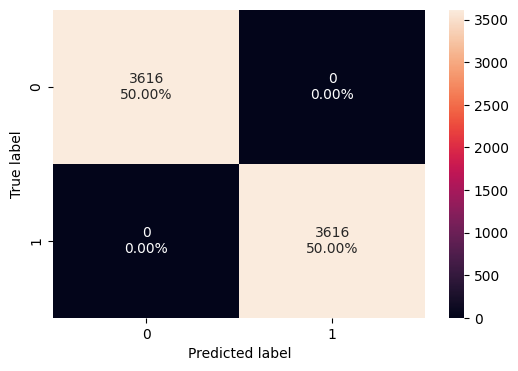

In [ ]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [ ]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


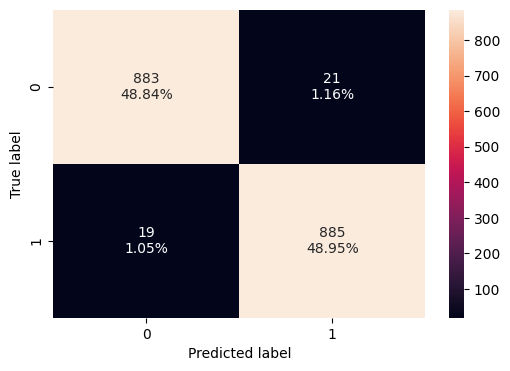

In [ ]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [ ]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.977876,0.978982,0.976821,0.977901


The test is performing slighly worse than the train data.

##### Visualizing Tree


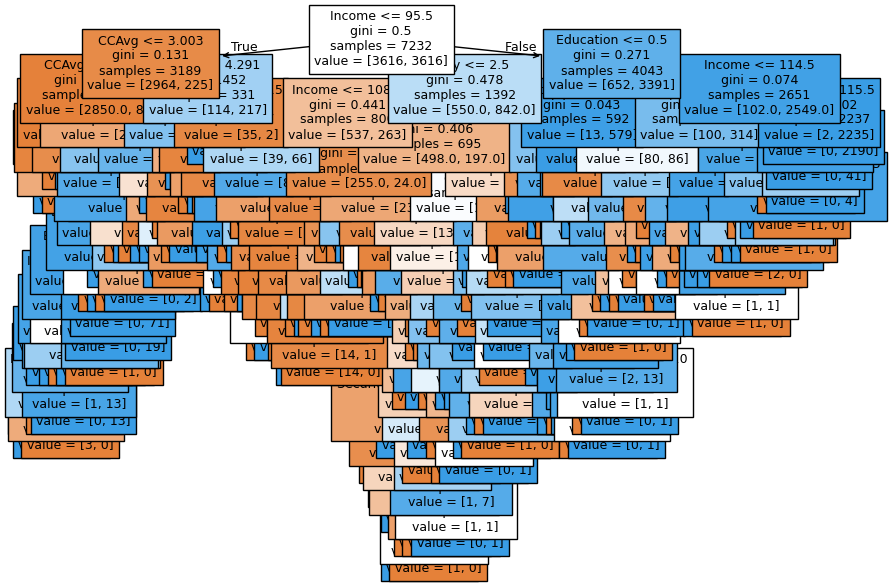

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

This looks very complex.

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree3,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 95.50
|   |--- CCAvg <= 3.00
|   |   |--- CCAvg <= 2.95
|   |   |   |--- Income <= 93.50
|   |   |   |   |--- weights: [2795.00, 0.00] class: 0
|   |   |   |--- Income >  93.50
|   |   |   |   |--- Mortgage <= 241.00
|   |   |   |   |   |--- weights: [29.00, 0.00] class: 0
|   |   |   |   |--- Mortgage >  241.00
|   |   |   |   |   |--- Experience <= 18.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Experience >  18.50
|   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |--- CCAvg >  2.95
|   |   |   |--- Mortgage <= 120.00
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [21.00, 0.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- Mortgage >  120.00
|   |   |   |   |--- Income <= 68.00
|   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |--- Income >  68.00
|   |   |   |   |   |--- weights: [2.00

## Model Performance Comparison and Final Model Selection

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.892976,1.0
Recall,1.0,0.997788,1.0
Precision,1.0,0.824874,1.0
F1,1.0,0.903129,1.0


In [ ]:
#testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.977876,0.883850,0.977876
Recall,0.978982,0.994469,0.978982
Precision,0.976821,0.814312,0.976821
F1,0.977901,0.895418,0.977901


* Pre-Prunned:
  * It shows a good generalization for unseen data
  * It did scarifice some performance in recall but achieves an excellent F1 score together with trained data set.

* Post-Prunned:
  * It mimicks the behavior of the first decision tree model.
  * it performs slightly worse than the training set.

In conclusion, dtree2 is the best model

### Feature Importance

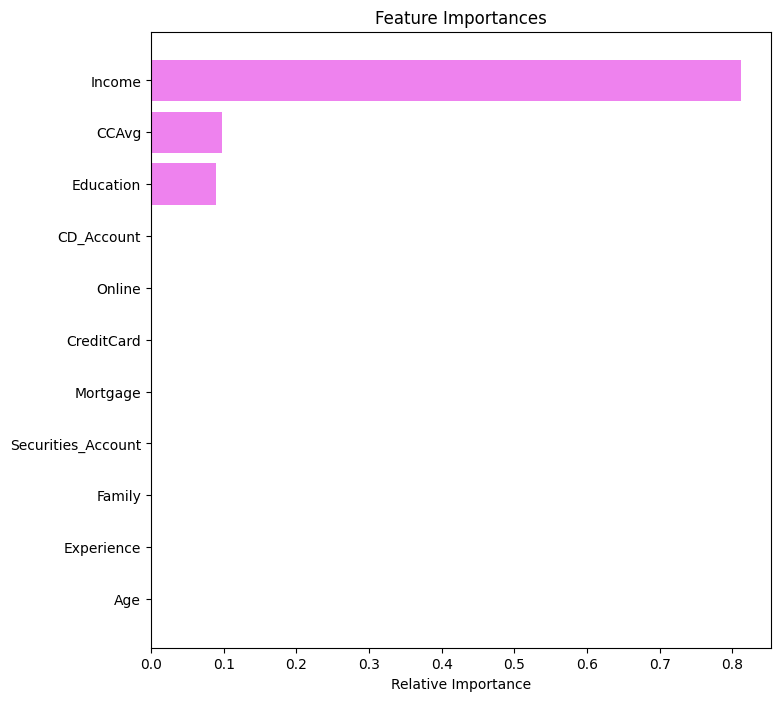

In [ ]:
#importance of features in the tree building
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to the model, income is the most important criteria to consider if bank is looking for custormers who are more likely to take a personal loan from the bank.
After this, the bank would also have to consider the ccAvg, the level of education and age.Mortgage is also an import factor to consider.

### Predicting on a single data point

In [ ]:
%%time
# choosing a data point
applicant_details = X_test.sample(n=1)

# making a prediction
approval_prediction = dtree2.predict(applicant_details)

print(approval_prediction)

[1]
CPU times: user 5.39 ms, sys: 14 µs, total: 5.4 ms
Wall time: 6.77 ms


It takes less than a second for the model to make a prediction.

In [ ]:
#making a prediction
approval_likelihood = dtree3.predict_proba(applicant_details)

print(approval_likelihood[0, 1])

0.0


The model makes confident predictions

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

* The Bank should target people who have a high annual income (95.5k and above), the pocess or are currently seeking a high degree in eduction, they have a family size of atleast 3.

* If customers are already using certain services provided by the bank like Securities Account, Credit Card...provided they fall under the category of customers highlighted by the model, they will be more likely to churn.

* The kinds of customers highlighted by the model are of a high income class, hence the marketing team of the bank should make an effort to target these types of people in areas they would most likely be found. These people can be identify by having infomation on their monthly credit card spending as it means that they would be more likely to afford the loan purchased from the bank.

* The bank should also make an effort to target educational institutions to be able to identify the class of customers identified by the model.

___